In [1]:
import sys
import os
import zipfile

import pandas as pd

import ipywidgets as widgets
from IPython.display import display

from pathlib import Path

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.plots import trumpet_draw
from ideal_genom.get_examples import get_trumpet_quantitative_example

In order to give a complete example, we are going to fetch the GWAS summary statistics from:

Akiyama, M., et. al. (2019): Characterizing rare and low-frequency height-associated variants in the Japanese population. *Nature communications*, 10(1), 4393.

In [2]:
example_path = get_trumpet_quantitative_example()

INFO:ideal_genom.get_examples:File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2019_BBJ_Height_autosomes_BOLT.txt.gz


In [3]:
df_gwas = pd.read_csv(
    example_path,
    sep=r'\s+',
    engine='python',
    compression='gzip'
)
df_gwas.head(10)

,Variants,CHR,POS,REF,ALT,ALT_freq,MAF,Rsq,BETA,SE,P_INF,P_BOLT
0,1:693206_G_A,1,693206,G,A,0.00369,0.00369,0.39601,-0.042707,0.040222,0.2900,0.370
1,1:707522_G_C,1,707522,G,C,0.12364,0.12364,0.36148,-0.005528,0.007711,0.4700,0.560
2,1:711310_G_A,1,711310,G,A,0.07469,0.07469,0.35086,-0.011567,0.009858,0.2400,0.280
3,1:713979_C_G,1,713979,C,G,0.00550,0.00550,0.39921,-0.029343,0.032835,0.3700,0.450
4,1:716131_C_T,1,716131,C,T,0.01464,0.01464,0.32096,-0.024144,0.022485,0.2800,0.250
5,1:725848_GATGGAATGGAATGGAATGGACTCGAAAGGATTGGAA...,1,725848,GATGGAATGGAATGGAATGGACTCGAAAGGATTGGAATGGAATACA...,G,0.02113,0.02113,0.36023,-0.049334,0.017857,0.0057,0.029
6,1:729739_C_T,1,729739,C,T,0.00570,0.00570,0.42783,-0.027945,0.031176,0.3700,0.450
7,1:731718_T_C,1,731718,T,C,0.13705,0.13705,0.46105,-0.004794,0.006523,0.4600,0.550
8,1:732032_A_C,1,732032,A,C,0.13607,0.13607,0.47481,-0.004814,0.006449,0.4600,0.550
9,1:734349_T_C,1,734349,T,C,0.13696,0.13696,0.48414,-0.004291,0.006368,0.5000,0.580


INFO:ideal_genom.visualization.plots:Filtering GWAS dataframe with p-value < 5e-12
INFO:ideal_genom.visualization.plots:Number of SNPs in filtered GWAS dataframe: 27680


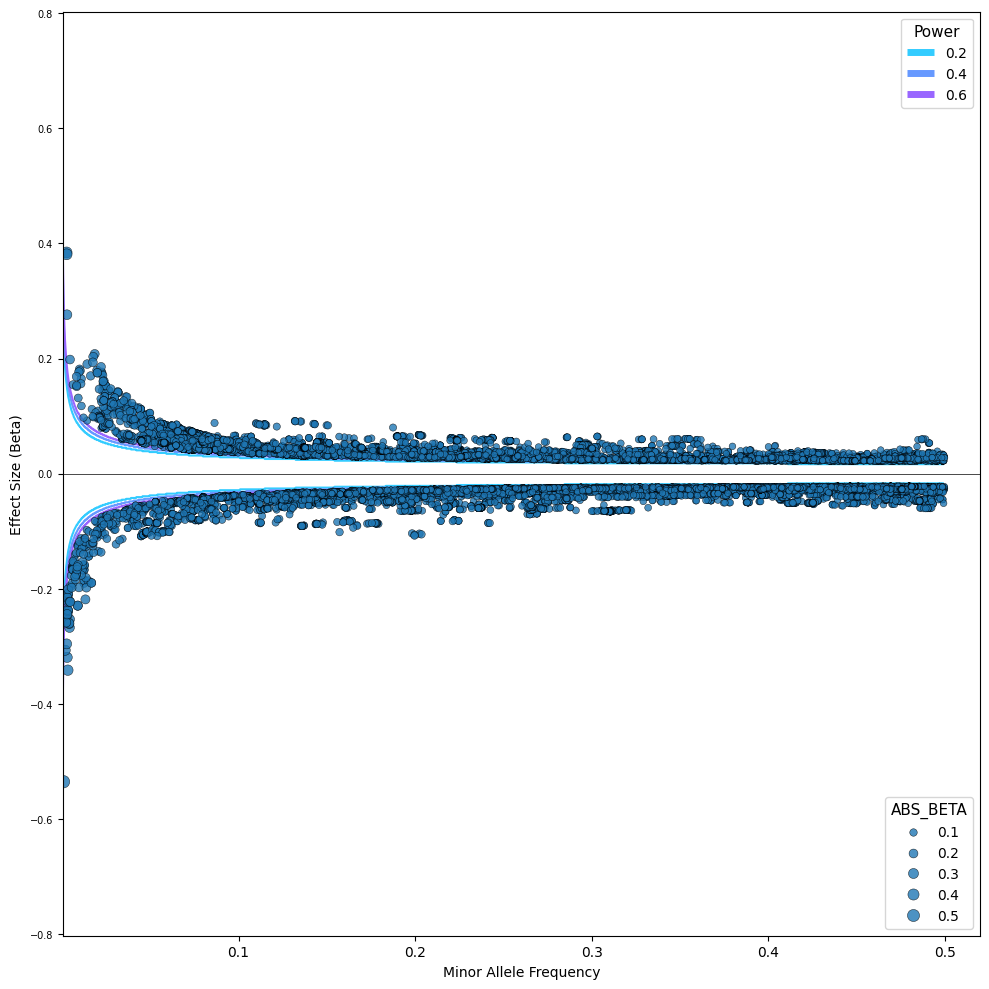

True

In [5]:
trumpet_draw(
    df_gwas    =df_gwas, 
    df_freq    =None, 
    plot_dir   = example_path.parent.as_posix(), 
    snp_col    ="Variants", 
    chr_col    ='CHR', 
    pos_col    ='POS', 
    maf_col    ='MAF', 
    beta_col   ='BETA', 
    power_ts   =[0.2,0.4,0.6], 
    sample_size=159095, 
    sample_size_strategy='median', 
    p_col      ='P_INF', 
    mode       ='quantitative', 
    p_filter   =5e-12, 
    save_name  ='trumpet_plot.jpeg',
)

In [8]:
df_gwas[df_gwas['P_INF'] < 5e-30]

,Variants,CHR,POS,REF,ALT,ALT_freq,MAF,Rsq,BETA,SE,P_INF,P_BOLT
157854,1:17306029_C_A,1,17306029,C,A,0.31327,0.31327,0.99709,0.039614,0.003328,1.100000e-32,6.000000e-32
157855,1:17306595_T_C,1,17306595,T,C,0.31407,0.31407,0.99559,0.039543,0.003328,1.400000e-32,7.900000e-32
157856,1:17306596_C_T,1,17306596,C,T,0.31409,0.31409,0.99579,0.039536,0.003327,1.400000e-32,7.900000e-32
157857,1:17306675_C_G,1,17306675,C,G,0.31408,0.31408,0.99897,0.039665,0.003322,7.300000e-33,7.600000e-32
157859,1:17306870_G_A,1,17306870,G,A,0.31380,0.31380,0.99686,0.039590,0.003326,1.200000e-32,6.500000e-32
...,...,...,...,...,...,...,...,...,...,...,...,...
27024493,22:33069689_C_T,22,33069689,C,T,0.68273,0.31727,0.95566,-0.040774,0.003439,2.000000e-32,7.400000e-34
27024505,22:33088914_T_C,22,33088914,T,C,0.66867,0.33133,0.96087,-0.038824,0.003393,2.600000e-30,2.600000e-32
27024579,22:33097461_T_TA,22,33097461,T,TA,0.69275,0.30725,0.97324,-0.039600,0.003442,1.300000e-30,1.200000e-32
27024675,22:33106533_T_C,22,33106533,T,C,0.69621,0.30379,0.97343,-0.040298,0.003453,1.800000e-31,7.500000e-34


At the end of the next cell, please fill the required values. The notebook could be modified according to the user interest and particular requirements, nevertheless in order to use as it is, the user should have the following specifications in mind. It is expected that all files are tab-separated-values, but the user can change this easily on the corresponding cell.

1. `input_path` is the path to the folder where the necessary files to draw the plot are.
2. `gwas_name` is the name of the file containing the **GWAS** summary statistics.
3. `freq_name` is the name of the file containing minor allele frequency for each SNP.
   
If the **GWAS** file already contains MAF the `freq_name` field can be left empty.

In [ ]:
# Create interactive widgets for input
input_path = widgets.Text(
    value='',
    description='Path to project folder:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

gwas_name = widgets.Text(
    value='',
    description='Name GWAS summary file:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

freq_name = widgets.Text(
    value='',
    description='Name of file with MAF:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

highlight = widgets.Text(
    value='',
    description='Name of file with SNPs to highlight:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

annotate = widgets.Text(
    value='',
    description='Name of file with SNPs to annotate:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

# Display the widgets
display(input_path, gwas_name, freq_name, highlight, annotate)

# Function to get the text parameter values
def get_params():
    return input_path.value, gwas_name.value, freq_name.value, highlight.value, annotate.value

In [ ]:
# Use the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")
print(f"Parameter 4: {path_params[3]}")
print(f"Parameter 5: {path_params[4]}")

In [ ]:
gwas_cols_touse = widgets.Textarea(
    value="ID, #CHROM, POS, P, BETA",
    description='Columns to use on the trumpet plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(gwas_cols_touse)

def get_gwas_cols():
    return gwas_cols_touse.value

In [ ]:
cols = get_gwas_cols()

df_gwas = pd.read_csv(
    os.path.join(path_params[0], path_params[1]), sep='\t', usecols=[col.strip() for col in cols.split(',')]
)
df_gwas.head(5)

In [ ]:
freq_cols_touse = widgets.Textarea(
    value="SNP, MAF",
    description='Columns to use on the trumpet plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(freq_cols_touse)

def get_freq_cols():
    return freq_cols_touse.value

In [ ]:
if path_params[2] != '':
    df_freq = pd.read_csv(
        os.path.join(path_params[0], path_params[2]), sep='\s+', 
        usecols=[col.strip() for col in get_freq_cols().split(',')]
    )
    df_freq.head(5)
else:
    df_freq = pd.DataFrame()

In [ ]:
df_freq.head(5)

In [ ]:
# use this cell to harmonize columns names if necessary
df_freq.columns = ['ID', 'MAF']

In [ ]:
rsID = widgets.Text(
    value='SNP',
    description='Column name with the rsID:',
    style={'description_width': 'initial'}
)

gene_col = widgets.Text(
    value='Nearest Gene',
    description='Column name with the nearest gene name:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

display(rsID, gene_col)

def get_rsID():
    return rsID.value
def get_gene_col():
    return gene_col.value

In [ ]:
gwas_rsID = get_rsID()

if path_params[3] is not None or path_params[3] != '':
    highlit_path = os.path.join(path_params[0], path_params[3])
    if os.path.exists(highlit_path):
        df_high = pd.read_csv(
            highlit_path, sep='\t'
        )
        to_highlight = df_high[gwas_rsID].to_list()
        print(to_highlight[:10])
        del df_high
    else:
        print('Path to file with SNPs to highlight does not exist')
        to_highlight = []
else:
    print('No file with SNPs to highlight')
    to_highlight = []

In [ ]:
gene_col = get_gene_col()

if path_params[3] is not None and path_params[3] != '':
    anno_path = os.path.join(path_params[0], path_params[3])
    if os.path.exists(anno_path):
        df_anno = pd.read_csv(
            anno_path, sep='\t',
        )
        if gene_col not in df_anno.columns:
            to_annotate = df_anno[[gwas_rsID]]
        else:
            to_annotate = df_anno[[gwas_rsID, gene_col]].copy()
        del df_anno
    else:
        print('Path to file with SNPs to annotate does not exist')
        to_annotate = pd.DataFrame()
else:
    print('No file with SNPs to annotate')
    to_annotate = pd.DataFrame()

to_annotate.head()

In [ ]:
SNP_col = widgets.Text(
    value='ID',
    description='Column with rsID:',
    style={'description_width': 'initial'}
)

CHR_col = widgets.Text(
    value='#CHROM',
    description='Column with chromosome:',
    style={'description_width': 'initial'}
)

POS_col = widgets.Text(
    value='POS',
    description='Column with base-pair position:',
    style={'description_width': 'initial'}
)

P_col = widgets.Text(
    value='P',
    description='Column with p-values:',
    style={'description_width': 'initial'}
)

BETA_col = widgets.Text(
    value='BETA',
    description='Column with BETA (Effect Size):',
    style={'description_width': 'initial'}
)
display(SNP_col, CHR_col, POS_col, P_col, BETA_col)

def get_col_names():
    return SNP_col.value, CHR_col.value, POS_col.value, P_col.value, BETA_col.value

In [ ]:
snp_col, chr_col, pos_col, p_col, beta_col = get_col_names()
to_annotate = to_annotate.rename(columns={gwas_rsID: snp_col, gene_col: 'GENENAME'})

In [ ]:
trumpet_draw(
    df_gwas     =df_gwas,
    df_freq     =df_freq,
    snp_col     =snp_col,
    p_col       =p_col,
    beta_col    =beta_col,
    chr_col     =chr_col,
    pos_col     =pos_col,
    maf_col     ='MAF',
    power_ts    =[0.2, 0.4, 0.6, 0.8, 0.9],
    n_case      =4806,
    n_control   =6364,
    prevalence  =0.05,
    plot_dir    =path_params[0],
    to_highlight=to_highlight,
    to_annotate =to_annotate,
    save_name   ='trumpet_plot.jpeg',
    gen_col     ='GENENAME'
    )